In [26]:
from sklearn.linear_model import ElasticNet
import numpy as np
import pandas as pd
import seaborn as sns
import time

Load the expression data

In [54]:
y = pd.read_csv("../data/day0/exp_singlets.tsv", sep="\t")

In [55]:
cells_y = y['cell']
y = y.drop(columns=['cell'])

In [56]:
y

,Mrpl15,Lypla1,Gm37988,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,St18,Pcmtd1,Gm26901,...,Vamp7,Spry3,Tmlhe,AC133103.1,Csprs,AC125149.4,AC168977.1,PISD,DHRSX,CAAA01147332.1
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16069,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Load the design matrix

In [57]:
X = pd.read_csv("../data/day0/design_guide_counts.tsv", sep="\t")

In [58]:
cells_x = X['cell']
X = X.drop(columns=['cell'])

In [59]:
X

,reads,m_Egr1_4,m_Irf1_4,m_Irf1_2,m_Irf1_1,m_Hif1a_3,m_Cebpb_1,m_Hif1a_1,m_Cebpb_3,m_Hif1a_4,...,m_Irf4_4,m_Rel_3,m_MouseNTC_100_A_67005,m_Rela_2,m_Irf2_1,m_Irf2_2,m_Irf2_3,m_Runx1_2,m_Rela_1,m_Nfkb1_2
0,4583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,856,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1399,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1175,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4546,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,7247,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16069,3341,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16070,7434,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16071,3987,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
mimosca = ElasticNet(l1_ratio = 0.5,alpha = 0.0005,max_iter = 10000)

In [62]:
coefs = mimosca.fit(X, y[list(y.columns)[0]]).sparse_coef_.todense()
for g in list(y.columns)[1:]:
    coefs = np.vstack((coefs, mimosca.fit(X, y[g]).sparse_coef_.todense()))

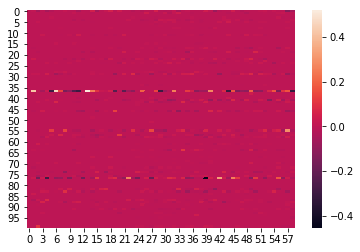

In [75]:
sns.heatmap(coefs)

In [78]:
coef_table = pd.DataFrame(coefs)
coef_table.columns = X.columns
coef_table['gene'] = y.columns[:100]
cols = coef_table.columns.tolist()
cols = cols[-1:] + cols[:-1]
coef_table = coef_table[cols]

In [69]:
coef_table.to_csv("../data/day0/mimosca_coefs.tsv", sep="\t", index=False)